In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("winequality-red.csv")   
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

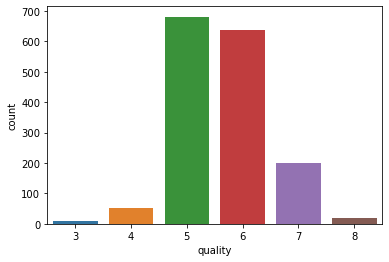

In [4]:
sns.countplot(df['quality'])

As we can see it is an imbalanced dataset where 5,6 & 7 wine quality have more no of entries than 4,8 &3. Therefore we willl apply SMOTE(Synthetic Minority Over-sampling Technique) to make the data balanced.

In [5]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [6]:
y.shape

(1599,)

In [7]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
dx,dy=sm.fit_resample(x,y)
dy

0       5
1       5
2       5
3       6
4       5
       ..
4081    8
4082    8
4083    8
4084    8
4085    8
Name: quality, Length: 4086, dtype: int64

In [8]:
dy.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

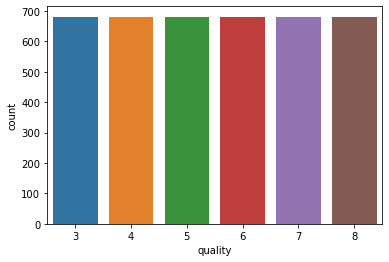

In [9]:
sns.countplot(dy)

In [10]:
dx['quality'] = dy      # Combining the Dataframe to add quality 

In [11]:
dx

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4081,6.208034,0.717819,0.158389,1.981598,0.053724,12.793088,74.517497,0.993695,3.504484,0.830575,12.873564,8
4082,8.474604,0.448063,0.424275,2.614921,0.077532,7.233861,17.000000,0.993901,3.180847,0.796614,12.563703,8
4083,7.456413,0.389617,0.270383,1.870516,0.072731,19.397548,26.961677,0.994187,3.271027,0.705641,11.583342,8
4084,8.982786,0.413675,0.484371,1.868375,0.071488,7.097678,16.097678,0.994398,3.209023,0.692930,12.558607,8


In [12]:
dx.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [13]:
dx.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [14]:
dx.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

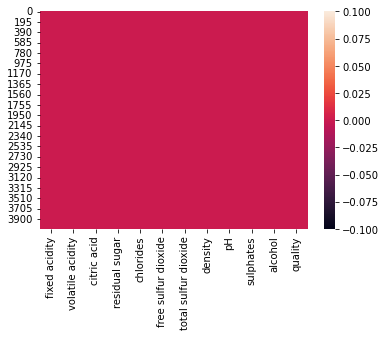

In [15]:
sns.heatmap(dx.isnull())

In [16]:
dx.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000
mean,8.366944,0.583664,0.272445,2.599335,0.088688,13.369253,36.448262,0.996521,3.326833,0.657431,10.716347,5.500000
std,1.628154,0.245978,0.199970,1.216312,0.044453,9.652976,28.613139,0.001857,0.151878,0.156929,1.169242,1.708034
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.200000,0.390000,0.080000,1.945831,0.069593,5.862657,15.085895,0.995384,3.220000,0.550000,9.800000,4.000000
50%,8.039778,0.540000,0.265871,2.200000,0.078685,10.501664,27.000000,0.996550,3.320000,0.630000,10.547866,5.500000
75%,9.391746,0.719134,0.440000,2.742733,0.091747,18.000000,48.000000,0.997671,3.421554,0.740000,11.452902,7.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:>

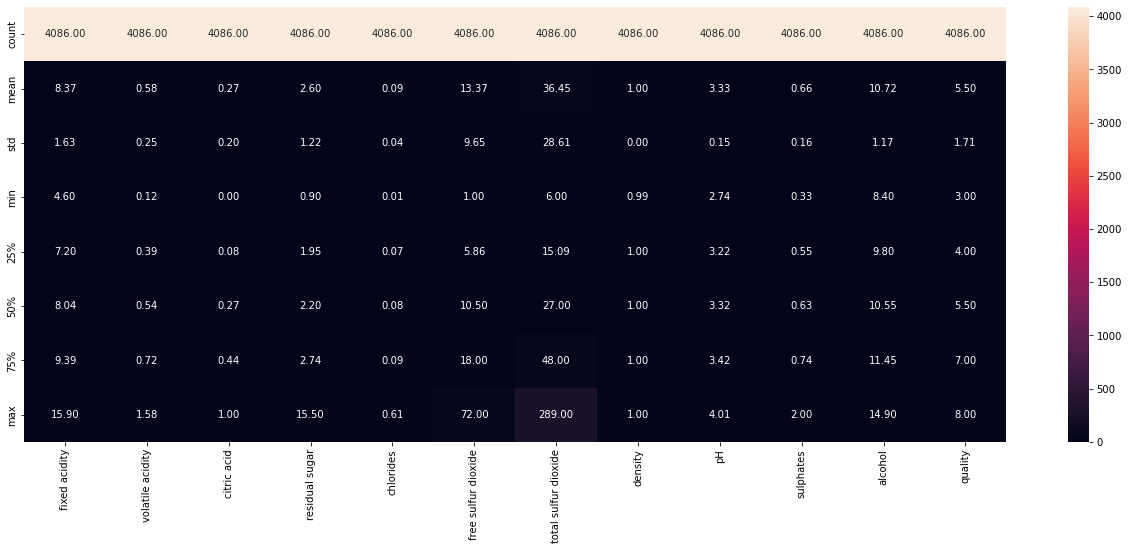

In [17]:
plt.figure(figsize=(22,8))
sns.heatmap(dx.describe(),annot=True,fmt="0.2f")

CORRELATION

In [18]:
dx.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.305290,0.720641,0.099691,0.086053,-0.130568,-0.115685,0.638246,-0.715859,0.200059,-0.116285,0.163629
volatile acidity,-0.305290,1.000000,-0.638415,0.095704,0.211786,-0.158738,-0.098012,0.097711,0.460125,-0.467169,-0.261961,-0.682152
citric acid,0.720641,-0.638415,1.000000,0.075744,0.077798,-0.005909,0.047157,0.288191,-0.677293,0.440865,0.160098,0.470692
residual sugar,0.099691,0.095704,0.075744,1.000000,0.007835,-0.012462,0.083188,0.319479,-0.016237,-0.054656,0.094218,-0.048867
chlorides,0.086053,0.211786,0.077798,0.007835,1.000000,0.015059,-0.013093,0.252148,-0.159108,0.201195,-0.328880,-0.334999
free sulfur dioxide,-0.130568,-0.158738,-0.005909,-0.012462,0.015059,1.000000,0.712366,-0.094617,0.048918,0.161778,-0.010391,0.074992
total sulfur dioxide,-0.115685,-0.098012,0.047157,0.083188,-0.013093,0.712366,1.000000,0.001845,-0.038984,0.118046,-0.103279,0.022772
density,0.638246,0.097711,0.288191,0.319479,0.252148,-0.094617,0.001845,1.000000,-0.306864,0.010806,-0.586549,-0.339984
pH,-0.715859,0.460125,-0.677293,-0.016237,-0.159108,0.048918,-0.038984,-0.306864,1.000000,-0.295220,0.140429,-0.315980
sulphates,0.200059,-0.467169,0.440865,-0.054656,0.201195,0.161778,0.118046,0.010806,-0.295220,1.000000,0.236165,0.466476


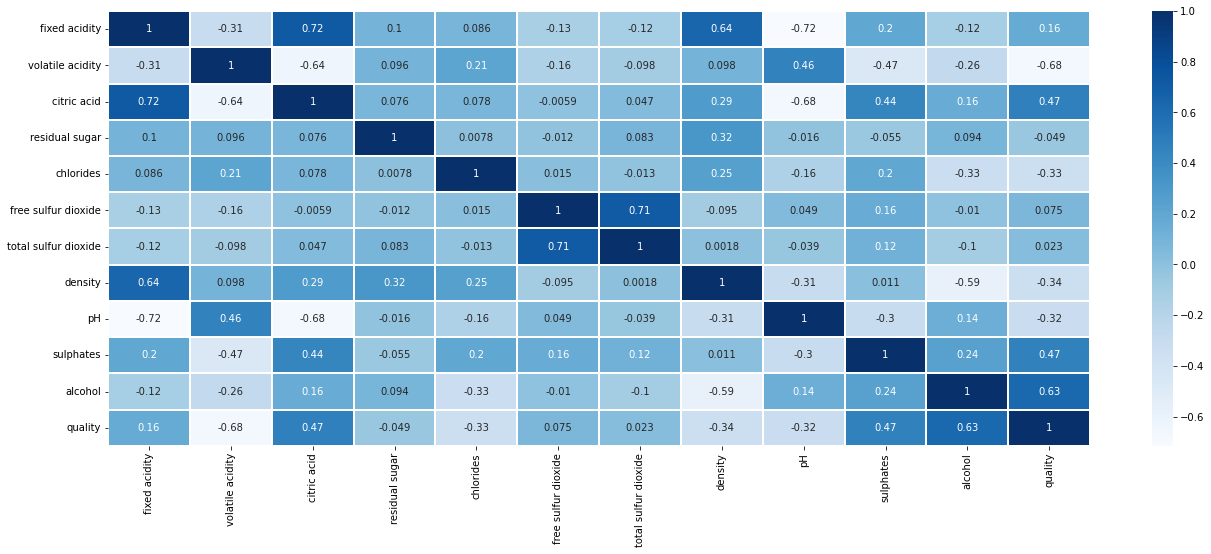

In [19]:
plt.figure(figsize=(22,8))
sns.heatmap(dx.corr(),annot=True,linewidths = 2,cmap="Blues")
plt.show()

In [20]:
dx.corr()['quality'].sort_values()

volatile acidity       -0.682152
density                -0.339984
chlorides              -0.334999
pH                     -0.315980
residual sugar         -0.048867
total sulfur dioxide    0.022772
free sulfur dioxide     0.074992
fixed acidity           0.163629
sulphates               0.466476
citric acid             0.470692
alcohol                 0.626035
quality                 1.000000
Name: quality, dtype: float64

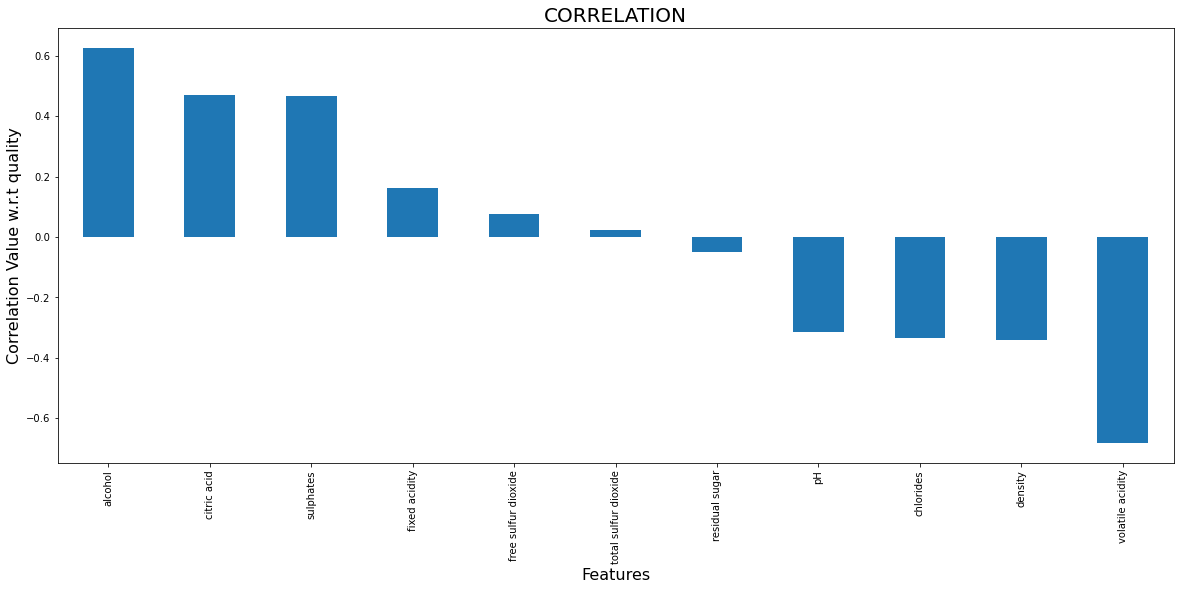

In [21]:
plt.figure(figsize=(20,8))
dx.corr()['quality'].sort_values(ascending=False).drop(['quality']).plot(kind='bar')
plt.xlabel("Features",fontsize=16)
plt.ylabel("Correlation Value w.r.t quality",fontsize=16)
plt.title("CORRELATION",fontsize=20)
plt.show()

From above we can see that some columns(features) are showing -ve correlation with wine quality. Those columns are :-
   1. volatile acidity
   2. density 
   3. chlorides
   4. pH
   5. residual sugar

In [22]:
x=dx.iloc[:,:-1]
y=dx.iloc[:,-1]
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...,...
4081,6.208034,0.717819,0.158389,1.981598,0.053724,12.793088,74.517497,0.993695,3.504484,0.830575,12.873564
4082,8.474604,0.448063,0.424275,2.614921,0.077532,7.233861,17.000000,0.993901,3.180847,0.796614,12.563703
4083,7.456413,0.389617,0.270383,1.870516,0.072731,19.397548,26.961677,0.994187,3.271027,0.705641,11.583342
4084,8.982786,0.413675,0.484371,1.868375,0.071488,7.097678,16.097678,0.994398,3.209023,0.692930,12.558607


In [23]:
x.shape

(4086, 11)

In [24]:
x.shape[1]

11

MULTICOLLINEARITY - Variance Inflation Factor(VIF)

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["Variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [27]:
calc_vif(x)

,Variables,VIF FACTOR
0,fixed acidity,100.438662
1,volatile acidity,18.048194
2,citric acid,12.663948
3,residual sugar,6.092013
4,chlorides,7.819165
5,free sulfur dioxide,6.622719
6,total sulfur dioxide,6.242094
7,density,1793.728468
8,pH,1362.166250
9,sulphates,30.067519


From Vif values we can see that : -
   1. density & pH - are having very high vif 
   2. alcohol & fixed acidity - are having second highest vif values close to each other - we can drop 'fixed acidity' as alcohol shows higher correlation with the wine quality

# Data Cleaning

In [28]:
dx.drop({'density','pH'},axis=1,inplace=True)  #Both density & pH are having very high VIF & also have -ve correlation with target
dx

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.580000,9.800000,6
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.560000,9.400000,5
...,...,...,...,...,...,...,...,...,...,...
4081,6.208034,0.717819,0.158389,1.981598,0.053724,12.793088,74.517497,0.830575,12.873564,8
4082,8.474604,0.448063,0.424275,2.614921,0.077532,7.233861,17.000000,0.796614,12.563703,8
4083,7.456413,0.389617,0.270383,1.870516,0.072731,19.397548,26.961677,0.705641,11.583342,8
4084,8.982786,0.413675,0.484371,1.868375,0.071488,7.097678,16.097678,0.692930,12.558607,8


In [29]:
calc_vif(dx)

,Variables,VIF FACTOR
0,fixed acidity,45.107447
1,volatile acidity,20.039097
2,citric acid,10.877866
3,residual sugar,6.121519
4,chlorides,7.443052
5,free sulfur dioxide,6.459079
6,total sulfur dioxide,5.683467
7,sulphates,31.195500
8,alcohol,95.787357
9,quality,39.307466


In [30]:
dx.drop('fixed acidity',axis=1,inplace=True)  # Dropping 'fixed acidity'
dx

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
0,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.560000,9.400000,5
1,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.680000,9.800000,5
2,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.650000,9.800000,5
3,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.580000,9.800000,6
4,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.560000,9.400000,5
...,...,...,...,...,...,...,...,...,...
4081,0.717819,0.158389,1.981598,0.053724,12.793088,74.517497,0.830575,12.873564,8
4082,0.448063,0.424275,2.614921,0.077532,7.233861,17.000000,0.796614,12.563703,8
4083,0.389617,0.270383,1.870516,0.072731,19.397548,26.961677,0.705641,11.583342,8
4084,0.413675,0.484371,1.868375,0.071488,7.097678,16.097678,0.692930,12.558607,8


In [31]:
calc_vif(dx)

,Variables,VIF FACTOR
0,volatile acidity,16.325139
1,citric acid,5.639573
2,residual sugar,6.095403
3,chlorides,7.442961
4,free sulfur dioxide,6.416590
5,total sulfur dioxide,5.614825
6,sulphates,30.702543
7,alcohol,91.576940
8,quality,39.296887


In [32]:
dx.describe()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
count,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000
mean,0.583664,0.272445,2.599335,0.088688,13.369253,36.448262,0.657431,10.716347,5.500000
std,0.245978,0.199970,1.216312,0.044453,9.652976,28.613139,0.156929,1.169242,1.708034
min,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.330000,8.400000,3.000000
25%,0.390000,0.080000,1.945831,0.069593,5.862657,15.085895,0.550000,9.800000,4.000000
50%,0.540000,0.265871,2.200000,0.078685,10.501664,27.000000,0.630000,10.547866,5.500000
75%,0.719134,0.440000,2.742733,0.091747,18.000000,48.000000,0.740000,11.452902,7.000000
max,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,2.000000,14.900000,8.000000


# Exploratory Data Analysis & Visualization

Univariate Analysis

BOXPLOTS

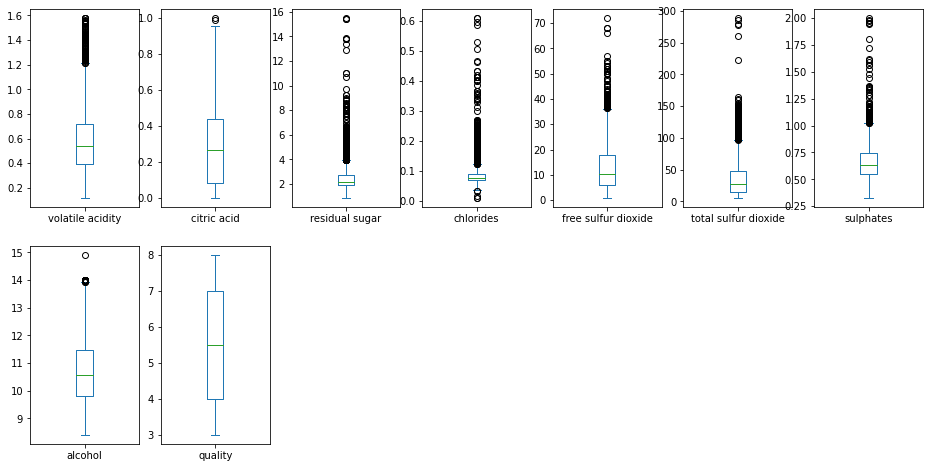

In [33]:
dx.plot(kind='box',subplots=True,layout=(2,7),figsize=(16,8)) 
plt.show()

As we can see from the boxplot that many outliers are present in the Input Columns.

Removing Outliers using Z-score

In [34]:
from scipy.stats import zscore
z=np.abs(zscore(dx))
z

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
0,0.473012,1.362593,0.575034,0.285461,0.245473,0.085575,0.620935,1.125950,0.29277
1,1.204874,1.362593,0.000547,0.209505,1.205035,1.067883,0.143838,0.783806,0.29277
2,0.716966,1.162539,0.246130,0.074515,0.168958,0.613490,0.047355,0.783806,0.29277
3,1.234667,1.438164,0.575034,0.307960,0.376173,0.823210,0.493473,0.783806,0.29277
4,0.473012,1.362593,0.575034,0.285461,0.245473,0.085575,0.620935,1.125950,0.29277
...,...,...,...,...,...,...,...,...,...
4081,0.545460,0.570435,0.507939,0.786638,0.059695,1.330644,1.103465,1.845195,1.46385
4082,0.551338,0.759357,0.012816,0.250987,0.635674,0.679780,0.887031,1.580153,1.46385
4083,0.788976,0.010312,0.599277,0.359015,0.624578,0.331587,0.307253,0.741592,1.46385
4084,0.691158,1.059919,0.601038,0.386966,0.649783,0.711319,0.226244,1.575794,1.46385


In [35]:
# Now to take out the ouliers lets define a threshold i.e 3 here
# All values with Z-score >3 will be considered as ouliers
# Making a new file for values with z-score<3

threshold=3
df_new=dx[(z<3).all(axis=1)]
df_new

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
0,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.560000,9.400000,5
1,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.680000,9.800000,5
2,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.650000,9.800000,5
3,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.580000,9.800000,6
4,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.560000,9.400000,5
...,...,...,...,...,...,...,...,...,...
4081,0.717819,0.158389,1.981598,0.053724,12.793088,74.517497,0.830575,12.873564,8
4082,0.448063,0.424275,2.614921,0.077532,7.233861,17.000000,0.796614,12.563703,8
4083,0.389617,0.270383,1.870516,0.072731,19.397548,26.961677,0.705641,11.583342,8
4084,0.413675,0.484371,1.868375,0.071488,7.097678,16.097678,0.692930,12.558607,8


In [36]:
dx.shape

(4086, 9)

In [37]:
df_new.shape

(3801, 9)

In [38]:
Data_Loss = ((4086-3815)/4086)*100
Data_Loss

6.6324033284385715

In [39]:
dx.skew()

volatile acidity        1.053415
citric acid             0.237186
residual sugar          3.535554
chlorides               4.967305
free sulfur dioxide     1.359240
total sulfur dioxide    2.077513
sulphates               2.024015
alcohol                 0.599655
quality                 0.000000
dtype: float64

DISTRIBUTION PLOTS

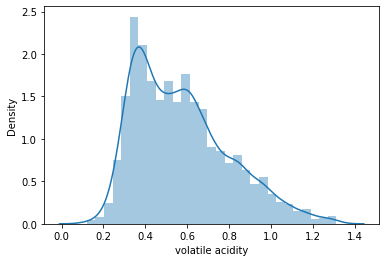

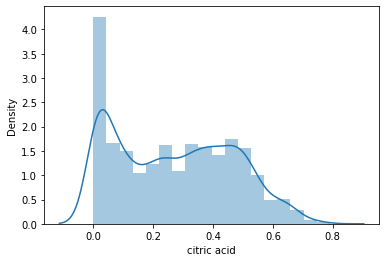

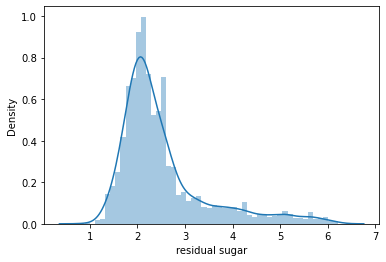

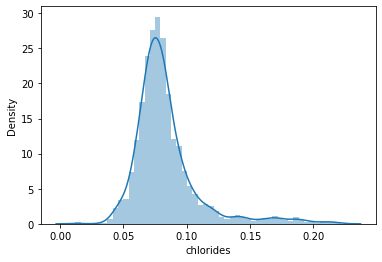

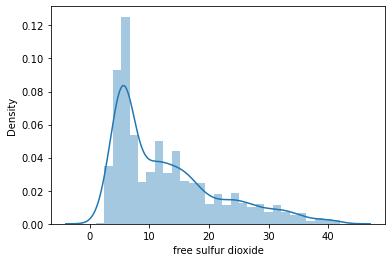

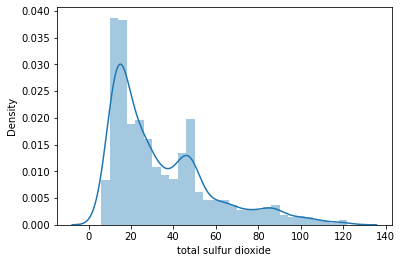

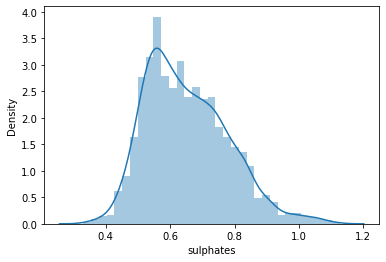

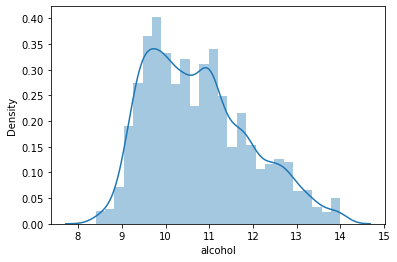

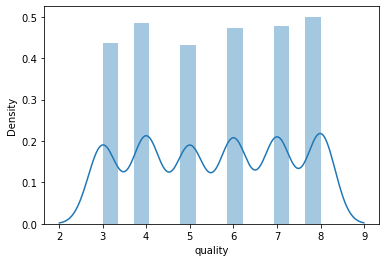

In [40]:
for i in df_new.columns:
    plt.figure()
    sns.distplot(df_new[i])
    plt.show()

From above Distribution Plots we can see that skewnees is present in many columns.

Skewness

In [41]:
df_new.skew()               # Checking Skewness

volatile acidity        0.742256
citric acid             0.188849
residual sugar          1.741738
chlorides               2.182071
free sulfur dioxide     1.106092
total sulfur dioxide    1.256674
sulphates               0.599872
alcohol                 0.564390
quality                -0.036590
dtype: float64

In [42]:
# Taking Skewness threshold as +/- 0.20
# We can see that all input columns other are skewed
# Also citric acid column is binodal
# So, Transformation techniques will be used for removing skewnees from the data.

Bivarate Analysis

SCATTERPLOTS

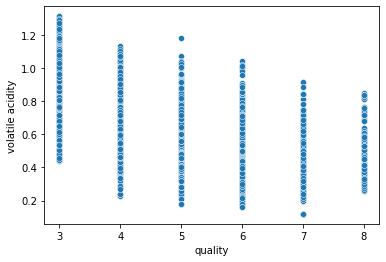

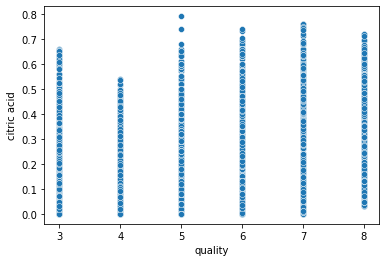

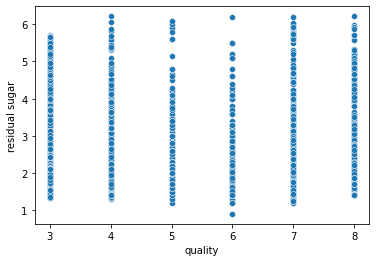

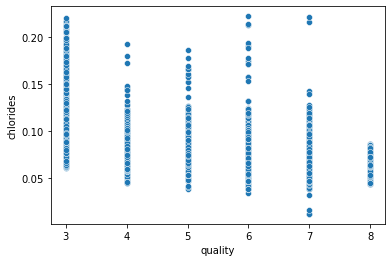

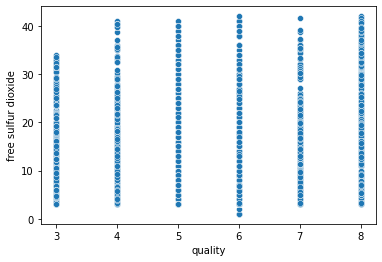

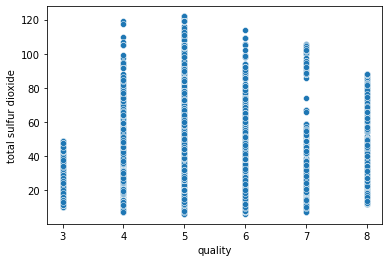

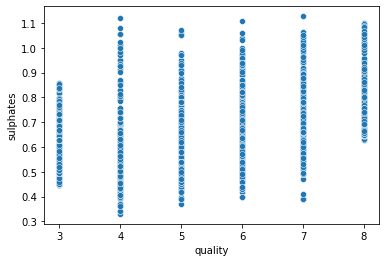

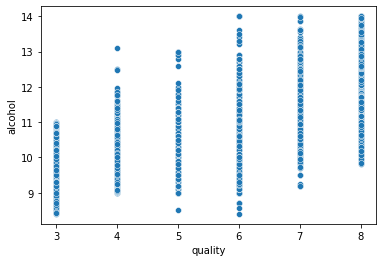

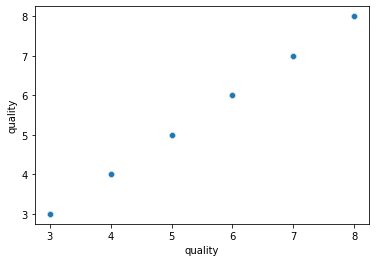

In [43]:
for i in df_new.columns:
    sns.scatterplot(x='quality',y=i,data=df_new)
    plt.show()

In [44]:
#Dividing the data into Independent columns & Target column

x = df_new.iloc[:,:-1]  # Independent Columns

y = pd.DataFrame(df_new.iloc[:,-1])  # Target Column

Using Power Transformation for removing skewnees from the data

In [45]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=True)

In [46]:
data = pt.fit_transform(x)
x = pd.DataFrame(data,columns=x.columns)

In [47]:
x.skew()                # Now we can see that the skewness is removed.

volatile acidity        0.057098
citric acid             0.002426
residual sugar          0.043524
chlorides              -0.142368
free sulfur dioxide     0.042282
total sulfur dioxide    0.042809
sulphates               0.023112
alcohol                 0.045186
dtype: float64

# CLASSIFICATION MODEL

Since,the outcome i.e. wine 'quality' have 6 outcomes, we will use Classification Models

Decision Tree Classifier

In [48]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Splitting the DataFrame

In [59]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i,test_size=0.22)
    dtc.fit(x_train,y_train)
    pred_test=dtc.predict(x_test)
    if round(accuracy_score(y_test,pred_test)*100,1) > 82.0:
        print("At random state",i,"The model preforms very well")
        print("Model Accuracy score is :-",accuracy_score(y_test,pred_test)*100,'\n')

At random state 70 The model preforms very well
Model Accuracy score is :- 82.19832735961768 

At random state 75 The model preforms very well
Model Accuracy score is :- 82.79569892473118 

At random state 148 The model preforms very well
Model Accuracy score is :- 82.19832735961768 

At random state 149 The model preforms very well
Model Accuracy score is :- 82.19832735961768 

At random state 154 The model preforms very well
Model Accuracy score is :- 82.19832735961768 

At random state 179 The model preforms very well
Model Accuracy score is :- 82.67622461170848 

At random state 225 The model preforms very well
Model Accuracy score is :- 82.43727598566308 

At random state 295 The model preforms very well
Model Accuracy score is :- 82.67622461170848 

At random state 305 The model preforms very well
Model Accuracy score is :- 82.19832735961768 

At random state 327 The model preforms very well
Model Accuracy score is :- 82.31780167264037 

At random state 474 The model preforms ver

From Above we can see that the model is performing best at Random state 663 as the Accuracy score is heighest at 663. Therefore using random_state = 663 for training the model.

In [69]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=663,test_size=0.22)

In [70]:
x_train.shape

(2964, 8)

In [71]:
y_train.shape

(2964, 1)

In [72]:
x_test.shape

(837, 8)

In [73]:
y_test.shape

(837, 1)

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors = 5)
svc = SVC(kernel='rbf')
dtc = DecisionTreeClassifier()

model = [knn,svc,dtc]

for m in model:
    m.fit(x_train,y_train)
    pred_test=m.predict(x_test)
    print('Accuracy Score of',m,'is:',accuracy_score(y_test,pred_test))
    print(confusion_matrix(y_test,pred_test))
    print(classification_report(y_test,pred_test))
    print('\n')

Accuracy Score of KNeighborsClassifier() is: 0.7921146953405018
[[125   1   0   0   0   0]
 [  7 136   4   2   0   0]
 [  4  32  63  23   6   0]
 [  5   9  19  71  31   9]
 [  0   1   2   9 112   8]
 [  0   0   0   0   2 156]]
              precision    recall  f1-score   support

           3       0.89      0.99      0.94       126
           4       0.76      0.91      0.83       149
           5       0.72      0.49      0.58       128
           6       0.68      0.49      0.57       144
           7       0.74      0.85      0.79       132
           8       0.90      0.99      0.94       158

    accuracy                           0.79       837
   macro avg       0.78      0.79      0.78       837
weighted avg       0.78      0.79      0.78       837



Accuracy Score of SVC() is: 0.7574671445639187
[[126   0   0   0   0   0]
 [  5 130  12   2   0   0]
 [  5  27  72  19   4   1]
 [  2  10  26  67  34   5]
 [  0   1   2  17  94  18]
 [  0   0   0   0  13 145]]
              prec

FROM above we can see that here Decision Tree Classifier Model is working best for the Model.

# Hyperparameter tuning : GridSearchCV

In [76]:
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier()

In [93]:
grid_param = {'criterion':['gini','entropy']}

gd_sr = GridSearchCV(estimator=dtc,param_grid=grid_param,scoring='accuracy',cv=5)

gd_sr.fit(x_train,y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)

best_result = gd_sr.best_score_
print(best_result)

{'criterion': 'entropy'}
0.7672052322136639


For our Decision Tree Classifier Model 'gini' is working best for the data.

In [94]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

dtc.fit(x_train,y_train)
pred_test=dtc.predict(x_test)
print('Accuracy Score of model is:',accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

Accuracy Score of model is: 0.8327359617682198
[[125   0   0   1   0   0]
 [  1 141   5   2   0   0]
 [  3  15  82  23   3   2]
 [  4   7  26  87  18   2]
 [  0   0   2  13 110   7]
 [  0   0   0   2   4 152]]
              precision    recall  f1-score   support

           3       0.94      0.99      0.97       126
           4       0.87      0.95      0.90       149
           5       0.71      0.64      0.67       128
           6       0.68      0.60      0.64       144
           7       0.81      0.83      0.82       132
           8       0.93      0.96      0.95       158

    accuracy                           0.83       837
   macro avg       0.82      0.83      0.83       837
weighted avg       0.83      0.83      0.83       837



# Cross-Validation of Model

In [95]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    score = cross_val_score(dtc,x,y,cv=i)
    c_score = score.mean()
    print("At cv:-",i)
    print("Cross Validation score is:-",c_score*100)
    print("Accuracy Score of model is :-",accuracy_score(y_test,pred_test)*100)
    print("\n")

At cv:- 2
Cross Validation score is:- 68.61348597690966
Accuracy Score of model is :- 83.27359617682198


At cv:- 3
Cross Validation score is:- 71.32333596421995
Accuracy Score of model is :- 83.27359617682198


At cv:- 4
Cross Validation score is:- 72.50711162764956
Accuracy Score of model is :- 83.27359617682198


At cv:- 5
Cross Validation score is:- 74.00743481568574
Accuracy Score of model is :- 83.27359617682198


At cv:- 6
Cross Validation score is:- 74.69226705737539
Accuracy Score of model is :- 83.27359617682198


At cv:- 7
Cross Validation score is:- 74.76979742173111
Accuracy Score of model is :- 83.27359617682198


At cv:- 8
Cross Validation score is:- 75.0343874391862
Accuracy Score of model is :- 83.27359617682198


At cv:- 9
Cross Validation score is:- 75.90177485475122
Accuracy Score of model is :- 83.27359617682198




Cross Validation Score is closest to Accuracy Score at cv:- 9.

In [96]:
score = cross_val_score(dtc,x,y,cv=9)
c_score = score.mean()
print("Cross Validation score is:-",c_score*100)
print("Accuracy Score of model is :-",accuracy_score(y_test,pred_test)*100)

Cross Validation score is:- 75.16572738918205
Accuracy Score of model is :- 83.27359617682198


# Saving the best Model

In [97]:
import pickle

filename = 'Red_Wine_Quality.pkl'

pickle.dump(dtc, open(filename,'wb'))  

# Conclusion

In [101]:
loaded_model = pickle.load(open('Red_Wine_Quality.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.8327359617682198


In [103]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],pred_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,827,828,829,830,831,832,833,834,835,836
Predicted,8,3,5,7,6,8,7,3,5,4,...,5,5,8,8,3,3,3,5,6,3
Original,8,3,5,7,6,8,7,3,5,4,...,5,5,8,8,3,3,3,5,6,3
